In [ ]:
! pip install pandas_profiling

In [ ]:
! pip install sweetviz

In [32]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import sweetviz as sv
from scipy.stats import kurtosis
from scipy.stats import skew

In [4]:
de_time = pd.read_csv("C:\\data science\\data sets\\delivery_time.csv")

In [7]:
de_time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [9]:
de_time.tail(5)

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [12]:
type(de_time)
de_time.shape

(21, 2)

In [5]:
de_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [28]:
de_time.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [29]:
data1 = de_time.rename(columns = {'Delivery Time': 'DT', 'Sorting Time': 'ST'}, inplace = False)

In [30]:
data1

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [31]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DT      21 non-null     float64
 1   ST      21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [33]:
print(kurtosis(data1.DT))
print(kurtosis(data1.ST))

-0.02558576894549036
-1.1653901357029155


In [34]:
print(skew(data1.DT))
print(skew(data1.ST))

0.326702631656106
0.043680994983108075


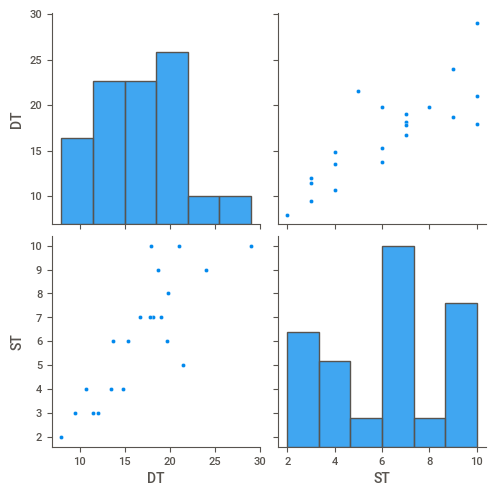

In [35]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data1)    #positve correlation

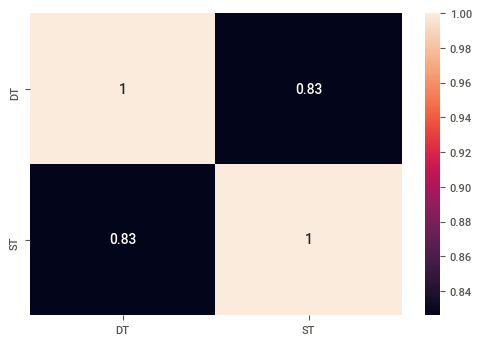

In [36]:
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = data1.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

<AxesSubplot:>

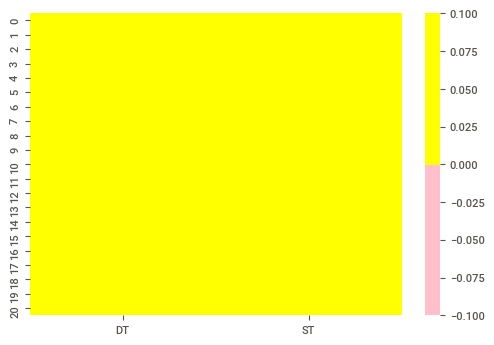

In [37]:
import seaborn as sns
cols = data1.columns 
colours = ['#ffc0cb', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data1[cols].isnull(),
            cmap=sns.color_palette(colours))

#no null values

<AxesSubplot:>

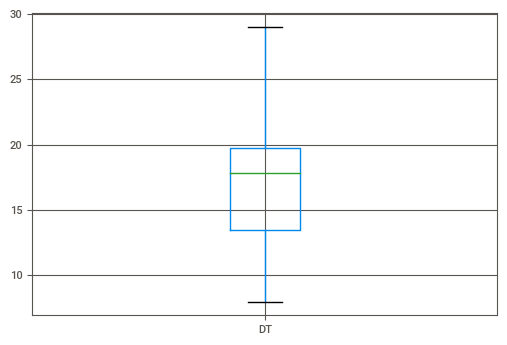

In [38]:
#Box plot
data1.boxplot(column=['DT'])

<AxesSubplot:>

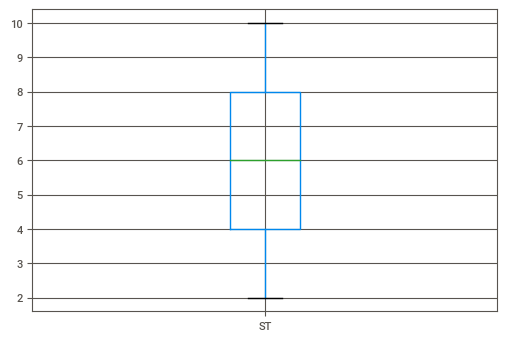

In [39]:
#Box plot
data1.boxplot(column=['ST'])

In [40]:
#Count of duplicated rows
data1[data1.duplicated()].shape

(0, 2)

<AxesSubplot:>

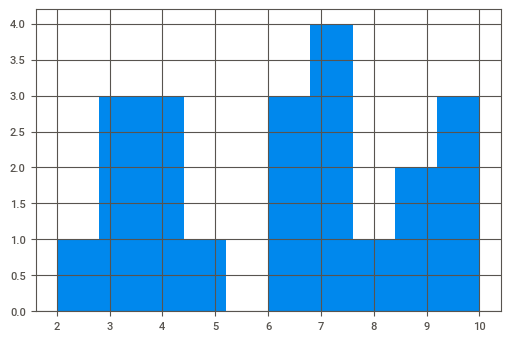

In [41]:
# histogram of Ozone
data1['ST'].hist()

<AxesSubplot:>

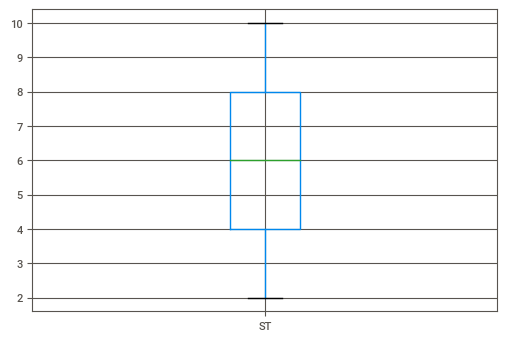

In [42]:
#Box plot
data1.boxplot(column=['ST'])

<AxesSubplot:>

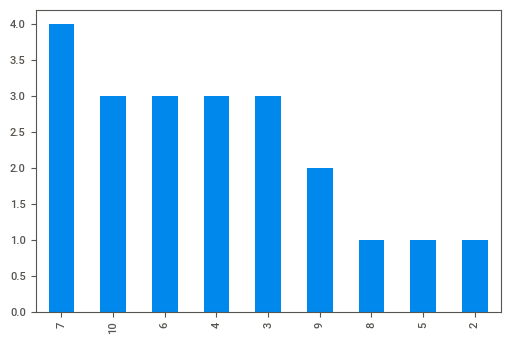

In [43]:
#Bar plot
data1['ST'].value_counts().plot.bar()

In [44]:
#Correlation
data1.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DT', ylabel='Density'>

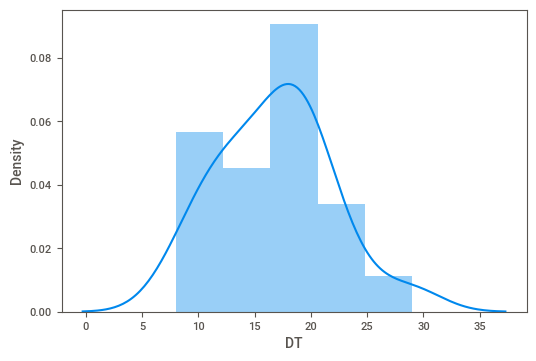

In [47]:
import seaborn as sns
sns.distplot(data1['DT'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ST', ylabel='Density'>

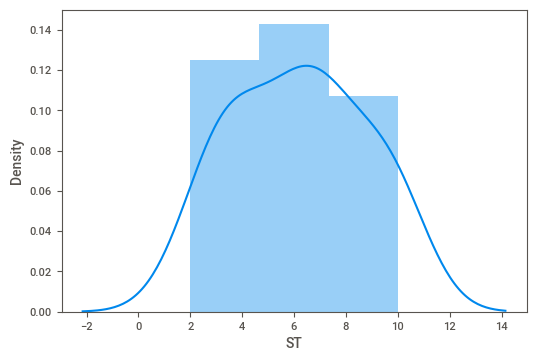

In [48]:
sns.distplot(data1['ST'])

In [49]:
import statsmodels.formula.api as smf
model = smf.ols("DT~ST",data = data1).fit()

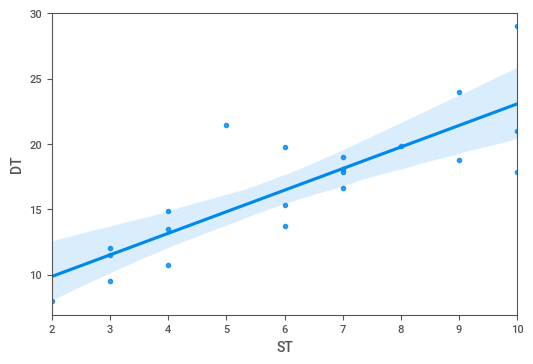

In [51]:
sns.regplot(x="ST", y="DT", data=data1);

In [52]:
#Coefficients
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [53]:
# t values
model.tvalues

Intercept    3.823349
ST           6.387447
dtype: float64

In [54]:
# p values
model.pvalues

Intercept    0.001147
ST           0.000004
dtype: float64

In [55]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 25 May 2021   Prob (F-statistic):           3.98e-06
Time:                        23:26:24   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


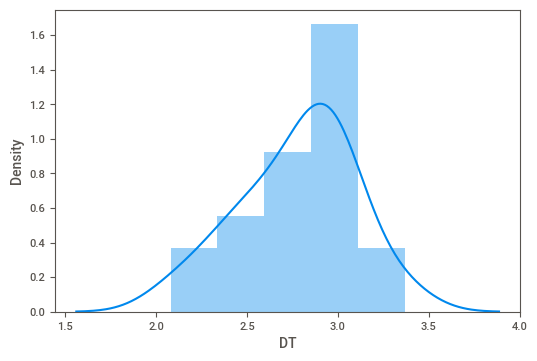

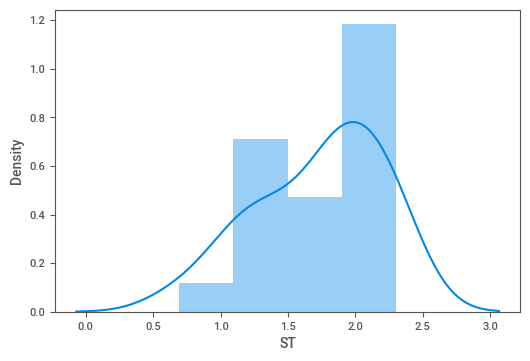

<Figure size 600x400 with 0 Axes>

In [57]:
data_1=data1
data_1['DT'] = np.log(data_1['DT'])
data_1['ST'] = np.log(data_1['ST'])
sns.distplot(data_1['DT'])
fig = plt.figure()
sns.distplot(data_1['ST'])
fig = plt.figure()

In [58]:
model_2 = smf.ols("ST~DT",data = data_1).fit()

In [59]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Tue, 25 May 2021   Prob (F-statistic):           1.60e-07
Time:                        23:27:32   Log-Likelihood:                 2.1913
No. Observations:                  21   AIC:                           -0.3826
Df Residuals:                      19   BIC:                             1.706
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8573      0.450     -4.131      0.001      -2.798      -0.916
DT             1.2923      0.161      8.024      0.000       0.955       1.629
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.258
Skew:                          -0.192   Prob(JB):                        0.879
Kurtosis:                       2.617   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


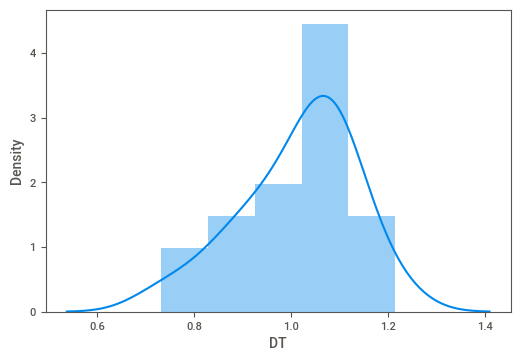

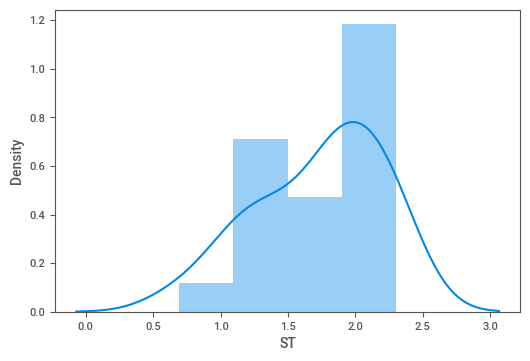

<Figure size 600x400 with 0 Axes>

In [60]:
data_2=data1
data_1['DT'] = np.log(data_1['DT'])
sns.distplot(data_1['DT'])
fig = plt.figure()
sns.distplot(data_1['ST'])
fig = plt.figure()

In [61]:
model_3 = smf.ols("ST~DT",data = data_2).fit()

In [62]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     69.40
Date:                Tue, 25 May 2021   Prob (F-statistic):           9.13e-08
Time:                        23:28:34   Log-Likelihood:                 2.8038
No. Observations:                  21   AIC:                            -1.608
Df Residuals:                      19   BIC:                            0.4814
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8026      0.427     -4.225      0.000      -2.696      -0.910
DT             3.4823      0.418      8.331      0.000       2.607       4.357
==============================================================================
Omnibus:                        0.491   Durbin-Watson:                   1.273
Prob(Omnibus):                  0.782   Jarque-Bera (JB):                0.353
Skew:                          -0.289   Prob(JB):                        0.838
Kurtosis:                       2.737   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


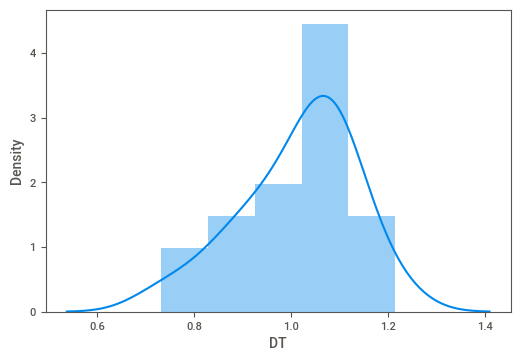

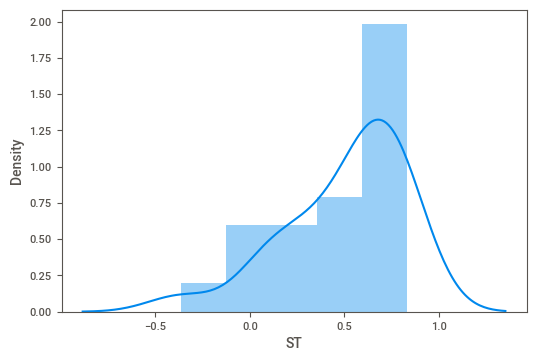

<Figure size 600x400 with 0 Axes>

In [63]:
data_3=data1
data_1['ST'] = np.log(data_1['ST'])
sns.distplot(data_1['DT'])
fig = plt.figure()
sns.distplot(data_1['ST'])
fig = plt.figure()

In [64]:
model_4 = smf.ols("ST~DT",data = data_3).fit()

In [65]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     77.21
Date:                Tue, 25 May 2021   Prob (F-statistic):           4.05e-08
Time:                        23:29:31   Log-Likelihood:                 11.820
No. Observations:                  21   AIC:                            -19.64
Df Residuals:                      19   BIC:                            -17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9199      0.278     -6.913      0.000      -2.501      -1.339
DT             2.3908      0.272      8.787      0.000       1.821       2.960
==============================================================================
Omnibus:                        1.317   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.518   Jarque-Bera (JB):                0.968
Skew:                          -0.237   Prob(JB):                        0.616
Kurtosis:                       2.061   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
data = de_time.iloc[:,1:]

In [7]:
data

,Sorting Time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [10]:
data['Sorting Time']=pd.to_numeric(data['Sorting Time'],errors='coerce')

<ipython-input-10-7c3d1eb857c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sorting Time']=pd.to_numeric(data['Sorting Time'],errors='coerce')


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Sorting Time  21 non-null     int64
dtypes: int64(1)
memory usage: 296.0 bytes


In [14]:
data

,Sorting Time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [13]:
data[data.duplicated()].shape

(12, 1)

In [16]:
data[data.duplicated()]

,Sorting Time
4,10
5,6
8,10
9,9
11,4
12,7
13,3
14,3
15,4
16,6


In [8]:
data_cleaned1=data.drop_duplicates()

In [20]:
data_cleaned1

,Sorting Time
0,10
1,4
2,6
3,9
6,7
7,3
10,8
18,2
20,5


In [21]:
data_cleaned1.shape

(9, 1)

In [9]:
data_cleaned3= data_cleaned1.rename({"Sorting Time":"sorting_time"},axis =1)

In [26]:
data_cleaned3

,sorting_time
0,10
1,4
2,6
3,9
6,7
7,3
10,8
18,2
20,5


<AxesSubplot:>

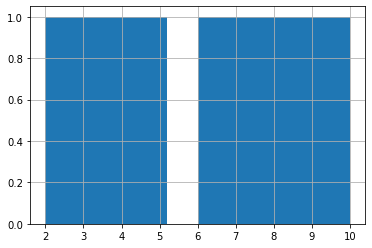

In [27]:
data_cleaned3["sorting_time"].hist()

<AxesSubplot:>

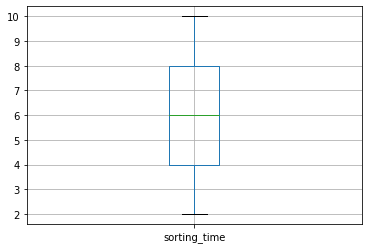

In [28]:
data_cleaned3.boxplot(column=["sorting_time"])

In [29]:
data_cleaned3["sorting_time"].describe()

count     9.000000
mean      6.000000
std       2.738613
min       2.000000
25%       4.000000
50%       6.000000
75%       8.000000
max      10.000000
Name: sorting_time, dtype: float64

<AxesSubplot:>

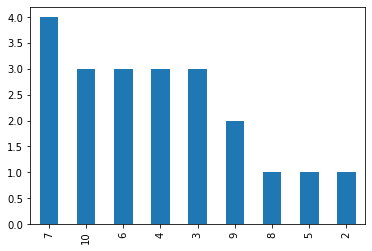

In [31]:
data["Sorting Time"].value_counts().plot.bar()

<AxesSubplot:>

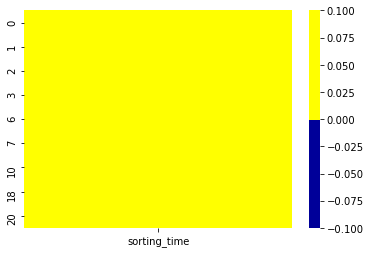

In [32]:
import seaborn as sns
cols = data_cleaned3.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data_cleaned3[cols].isnull(),
            cmap=sns.color_palette(colours))

In [37]:
data_cleaned3.isnull().sum()

sorting_time    0
dtype: int64

In [11]:
mean = data_cleaned3["sorting_time"].mean()
mean

6.0

In [12]:
data_cleaned3['sorting_time'] = data_cleaned3['sorting_time'].fillna(mean)

In [13]:
data_cleaned3

,sorting_time
0,10
1,4
2,6
3,9
6,7
7,3
10,8
18,2
20,5


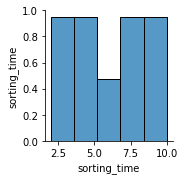

In [14]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data_cleaned3)

In [15]:
data_cleaned3.corr()

,sorting_time
sorting_time,1.0


In [16]:
#Creating dummy variable for Weather column
data_cleaned4=pd.get_dummies(data,columns=['Sorting Time'])

In [17]:
data_cleaned4

,Sorting Time_2,Sorting Time_3,Sorting Time_4,Sorting Time_5,Sorting Time_6,Sorting Time_7,Sorting Time_8,Sorting Time_9,Sorting Time_10
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1
5,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,1,0,0,0
7,0,1,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,1,0


In [18]:
data_cleaned4= data_cleaned4.dropna()

In [19]:
data_cleaned4

,Sorting Time_2,Sorting Time_3,Sorting Time_4,Sorting Time_5,Sorting Time_6,Sorting Time_7,Sorting Time_8,Sorting Time_9,Sorting Time_10
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1
5,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,1,0,0,0
7,0,1,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,1,0


In [20]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [22]:
data_cleaned4.values

array([[0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0]], dtype=uint8)

In [23]:
array = data_cleaned3.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array[:,0:5])

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[1.  ]
 [0.25]
 [0.5 ]
 [0.88]
 [0.62]]


In [24]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

In [25]:
array = data_cleaned4.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[-0.22 -0.41 -0.41 -0.22 -0.41 -0.49 -0.22 -0.32  2.45]
 [-0.22 -0.41  2.45 -0.22 -0.41 -0.49 -0.22 -0.32 -0.41]
 [-0.22 -0.41 -0.41 -0.22  2.45 -0.49 -0.22 -0.32 -0.41]
 [-0.22 -0.41 -0.41 -0.22 -0.41 -0.49 -0.22  3.08 -0.41]
 [-0.22 -0.41 -0.41 -0.22 -0.41 -0.49 -0.22 -0.32  2.45]]


In [26]:
EDA_report= pp.ProfileReport(data)
EDA_report.to_file(output_file='report.html')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [66]:
sweet_report = sv.analyze(data)
sweet_report.show_html('Sorting Time.html')


Report Sorting Time.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
